In [1]:
import pandas as pd
df = pd.read_csv('visits.csv', sep='\t')
df.head()

,date_time,id,time_spent,name
0,20180406T165358,76144fb2,98.0,Василёк
1,20180404T173913,76144fb2,15.0,Василёк
2,20180403T172824,76144fb2,220.0,Василёк
3,20180407T070441,76144fb2,19.0,Василёк
4,20180404T132049,76144fb2,14.0,Василёк


In [2]:
df['too_fast'] = df['time_spent'] < 60

df['too_slow'] = df['time_spent'] > 1000



too_fast_stat = df.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = df.query('id in @good_ids.index')
len(good_ids)


386

In [9]:
len(good_data)

229095

In [17]:
good_data = df.query('id in @good_ids.index and 60 <= time_spent <= 1000')
len(good_data)
good_data.head(10)

,date_time,id,time_spent,name,too_fast,too_slow
0,20180406T165358,76144fb2,98.0,Василёк,False,False
2,20180403T172824,76144fb2,220.0,Василёк,False,False
6,20180402T082321,76144fb2,555.0,Василёк,False,False
7,20180407T003408,76144fb2,286.0,Василёк,False,False
9,20180405T131939,76144fb2,248.0,Василёк,False,False
10,20180404T192552,76144fb2,236.0,Василёк,False,False
11,20180405T132943,76144fb2,225.0,Василёк,False,False
12,20180406T133522,76144fb2,278.0,Василёк,False,False
14,20180406T081933,76144fb2,450.0,Василёк,False,False
15,20180406T071552,76144fb2,285.0,Василёк,False,False


array([[<AxesSubplot:title={'center':'time_spent'}>]], dtype=object)

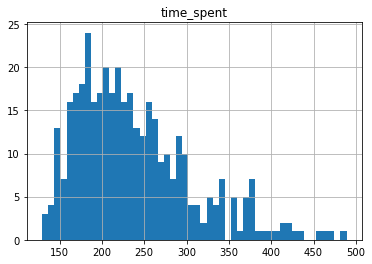

In [4]:
good_data = df.query('id in @good_ids.index and 60 <= time_spent <= 1000')

station_stat = df.pivot_table(index='id', values='time_spent', aggfunc='median')
good_station_stat = good_data.pivot_table(index='id', values='time_spent', aggfunc='median')
good_station_stat.hist(bins=50)



In [7]:
good_stat = good_data.pivot_table(index='name', values='time_spent', aggfunc='median')
good_stat.sort_values('time_spent')

,time_spent
name,
Белоцветник,154.0
Бальзамин,158.0
Незабудка,161.0
Колокольчик,161.0
Обриета,167.0
Функия,171.5
Гацания,178.5
Аммобиум,180.5
Пион,180.5


<AxesSubplot:ylabel='Frequency'>

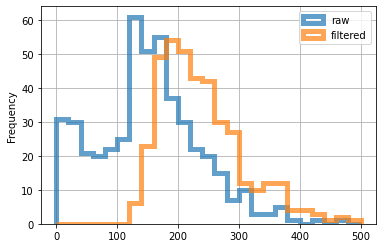

In [8]:
median_station_stat = df.pivot_table(
    index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median')

ax = median_station_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='raw',)

good_stations_stat.plot(
    kind='hist',
    y='time_spent',
    histtype='step',
    range=(0, 500),
    bins=25,
    linewidth=5,
    alpha=0.7,
    label='filtered',
    ax=ax,
    grid=True,
    legend=True,) 


In [3]:
df = pd.read_csv('visits.csv', sep='\t')
df['too_fast'] = df['time_spent'] < 60
df['too_slow'] = df['time_spent'] > 1000

too_fast_stat = df.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = df.query(
    'id in @good_ids.index and 60 <= time_spent <= 1000')

station_stat = df.pivot_table(
    index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median')

stat = df.pivot_table(
    index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median')

In [11]:
stat['good_time_spent'] = good_stat

In [13]:
stat['good_time_spent'].head()

name
Агератум    309.0
Амарант     187.5
Аммобиум    180.5
Арктотис    185.0
Астильба    423.0
Name: good_time_spent, dtype: float64

In [15]:
stat['time_spent'].head()


name
Агератум    337.802721
Амарант     132.760012
Аммобиум    256.708042
Арктотис     73.879984
Астильба    376.143149
Name: time_spent, dtype: float64

In [24]:
id_name = good_data.pivot_table(
    index='id', values='name', aggfunc=['first' , 'count'])
id_name.head()

,first,count
,name,name
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157


In [26]:
id_name.columns = ['name', 'count']
id_name.head()

,name,count
id,,
00ca1b70,Вероника,131
0178ce70,Василёк,164
01abf4e9,Гацания,30
030a9067,Колокольчик,228
03740f2d,Василёк,157


In [28]:
station_stat_full = id_name.join(good_station_stat)
station_stat_full.head()

,name,count,time_spent
id,,,
00ca1b70,Вероника,131,166.0
0178ce70,Василёк,164,234.5
01abf4e9,Гацания,30,181.5
030a9067,Колокольчик,228,135.5
03740f2d,Василёк,157,289.0


<AxesSubplot:>

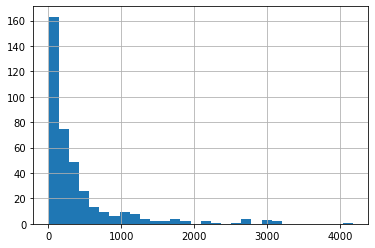

In [30]:
station_stat_full['count'].hist(bins=30)

<AxesSubplot:>

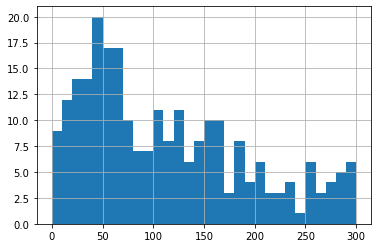

In [34]:
station_stat_full['count'].hist(bins=30, range=(0, 300))

In [45]:
good_stat2 = station_stat_full.query('count > 30').pivot_table(
    index='name', values = 'time_spent',
    aggfunc=['median', 'count'])
    
good_stat2.columns = ['median_time', 'stations']

good_stat2.head()

,median_time,stations
name,,
Агератум,308.50,3
Амарант,169.00,5
Аммобиум,178.75,4
Арктотис,190.50,3
Астильба,435.50,4


In [46]:
final_stat = good_stat2.join(stat)
final_stat.head()

,median_time,stations,time_spent,good_time_spent
name,,,,
Агератум,308.50,3,337.802721,309.0
Амарант,169.00,5,132.760012,187.5
Аммобиум,178.75,4,256.708042,180.5
Арктотис,190.50,3,73.879984,185.0
Астильба,435.50,4,376.143149,423.0


<AxesSubplot:xlabel='time_spent', ylabel='count'>

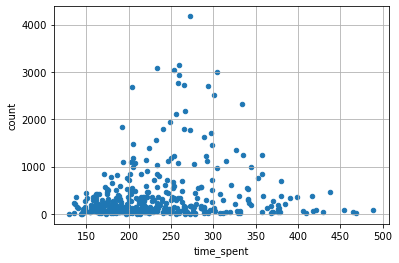

In [49]:
station_stat_full.plot(x='time_spent', y='count', kind='scatter', grid=True)
hw.plot(x='height', y='weight', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True) 


<AxesSubplot:xlabel='time_spent', ylabel='count'>

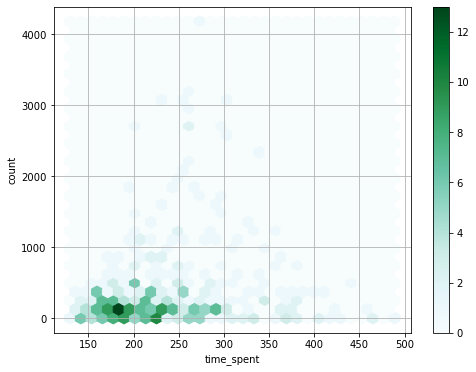

In [57]:
station_stat_full.plot(x='time_spent', y='count', kind='hexbin',
                       gridsize=30, figsize=(8,6), sharex=False,grid=True)

In [64]:
print(station_stat_full['time_spent'].corr(station_stat_full['count']))
df.head()

0.12242632473597159


,date_time,id,time_spent,name,too_fast,too_slow
0,20180406T165358,76144fb2,98.0,Василёк,False,False
1,20180404T173913,76144fb2,15.0,Василёк,True,False
2,20180403T172824,76144fb2,220.0,Василёк,False,False
3,20180407T070441,76144fb2,19.0,Василёк,True,False
4,20180404T132049,76144fb2,14.0,Василёк,True,False


/var/folders/sp/vlkf_hcn5w19lnw7d31b0cl40000gn/T/ipykernel_16319/2121370354.py:25: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  station_stat_full = id_name.join(good_station_stat)


            time_spent  too_fast  too_slow
time_spent    1.000000 -0.640658  0.802247
too_fast     -0.640658  1.000000 -0.255876
too_slow      0.802247 -0.255876  1.000000


array([[<AxesSubplot:xlabel='time_spent', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_fast', ylabel='time_spent'>,
        <AxesSubplot:xlabel='too_slow', ylabel='time_spent'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_fast'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_fast'>],
       [<AxesSubplot:xlabel='time_spent', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_fast', ylabel='too_slow'>,
        <AxesSubplot:xlabel='too_slow', ylabel='too_slow'>]], dtype=object)

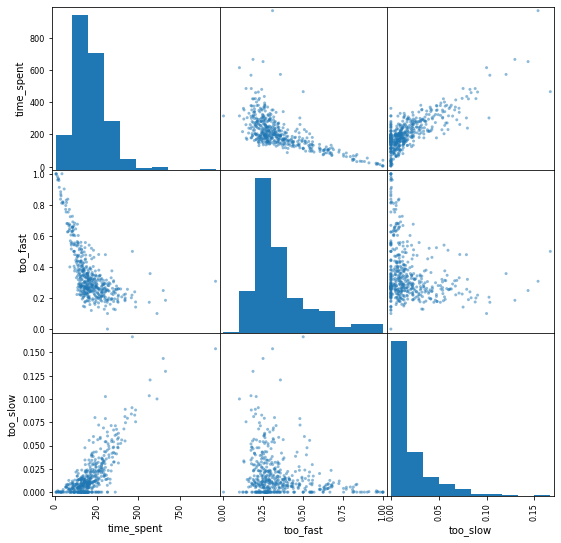

In [12]:
import pandas as pd
df = pd.read_csv('visits.csv', sep='\t')
df['too_fast'] = df['time_spent'] < 60
df['too_slow'] = df['time_spent'] > 1000

too_fast_stat = df.pivot_table(index='id', values='too_fast')
good_ids = too_fast_stat.query('too_fast < 0.5')
good_data = df.query(
    'id in @good_ids.index and 60 <= time_spent <= 1000')

station_stat = df.pivot_table(
    index='id', values='time_spent', aggfunc='median')
good_stations_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median')

stat = df.pivot_table(
    index='name', values='time_spent')
good_stat = good_data.pivot_table(
    index='name', values='time_spent', aggfunc='median')

id_name = good_data.pivot_table(
    index='id', values='name', aggfunc=['first' , 'count'])
good_station_stat = good_data.pivot_table(
    index='id', values='time_spent', aggfunc='median')
station_stat_full = id_name.join(good_station_stat)

station_stat_multi = df.pivot_table(
    index='id', values=['time_spent', 'too_fast', 'too_slow'],
    aggfunc='mean')
print(station_stat_multi.corr())        

pd.plotting.scatter_matrix(station_stat_multi, figsize=(9, 9))

In [16]:
print(station_stat_multi['good_time_spent']).corr(good_station_stat['time_spent'])
ЗАЕБАЛСЯ

KeyError: 'good_time_spent'